![ups logo](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Logo_Universidad_Polit%C3%A9cnica_Salesiana_del_Ecuador.png/640px-Logo_Universidad_Polit%C3%A9cnica_Salesiana_del_Ecuador.png)

### Visión por computador P64

### Practica 04


### Clasificación de Imagenes con Shape Signature Descriptor


### Autores: Diego Tapia y Paul Astudillo

Importación de librerías

In [1]:
import cv2
import matplotlib.pyplot as pp
from io import BytesIO # Librería para manipular bytes de datos en memoria
from PIL import Image # Estructura que representa la imagen en el paquete PIL
import requests
import numpy as np
import scipy as sp
from scipy.fftpack import fft, ifft

print("Librerias importadas")

Librerias importadas


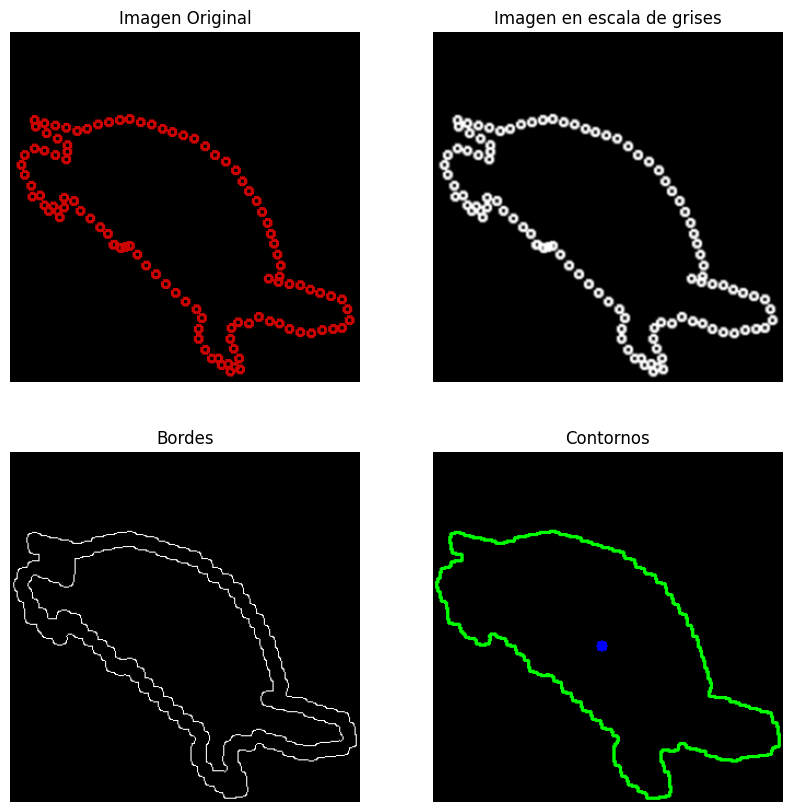

In [10]:

src = "./dataset/train/turtle-2.png"


img = Image.open(src).convert('RGB')


image = np.array(img)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Definir el kernel para las operaciones morfológicas
kernel = np.ones((5, 5), np.uint8)

gray = cv2.GaussianBlur(gray, (3,3), 0)

# Aplicar dilatación
dilated = cv2.dilate(gray, kernel, iterations=2)

# Aplicar erosión sobre la imagen dilatada
closed_manual = cv2.erode(dilated, kernel, iterations=1)
# Aplicar el detector de bordes de Canny



bordes = cv2.Canny(closed_manual, 50, 100)



contornos, jerarquia = cv2.findContours(bordes, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contornos = np.zeros(image.shape, dtype=np.uint8)
cv2.drawContours(img_contornos, contornos, -1, (0, 255, 0), 2)
centroide = cv2.moments(contornos[0])
centroide = (int(centroide['m10'] / centroide['m00']), int(centroide['m01'] / centroide['m00']))
cv2.circle(img_contornos, centroide, 5, (0, 0, 255), -1)

figure, axes = pp.subplots(nrows=2, ncols=2)
figure.set_size_inches(10,10)

axes[0,0].imshow(image)
axes[0,0].axis('off')
axes[0,0].set_title('Imagen Original')

axes[0,1].imshow(gray, cmap='gray')
axes[0,1].axis('off')
axes[0,1].set_title('Imagen en escala de grises')

axes[1,0].imshow(bordes, cmap='gray')
axes[1,0].axis('off')
axes[1,0].set_title('Bordes')

axes[1,1].imshow(img_contornos)
axes[1,1].axis('off')
axes[1,1].set_title('Contornos')


pp.show()

#print(contornos)

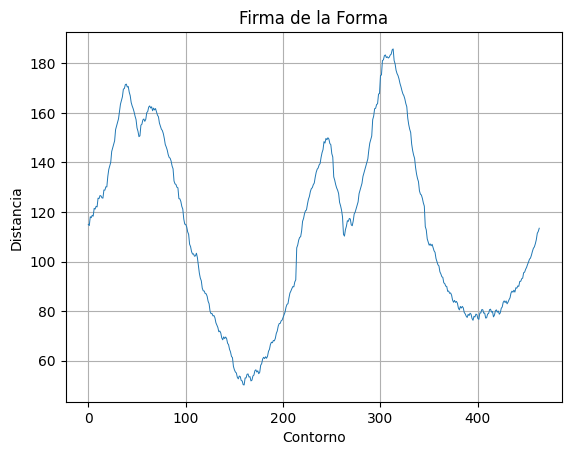

In [11]:
distancias = []

def get_distance(contor, centroide):
  distancia = np.sqrt((contor[0][0] - centroide[0])**2 + (contor[0][1] - centroide[1])**2)
  return distancia

for contorno in contornos[0]:
  #print(contorno[0])
  distancias.append(get_distance(contorno, centroide))

#print(len(distancias))

ix = np.arange(0,len(distancias),1)
pp.plot(ix, distancias, lw=0.7)
pp.title('Firma de la Forma')
pp.xlabel('Contorno')
pp.ylabel('Distancia')
pp.grid(True)
pp.show()

## Transformada de Fourier de la Firma de la Forma

A fin de contar con un descriptor que sea invariante a rotación, translación y escala, se


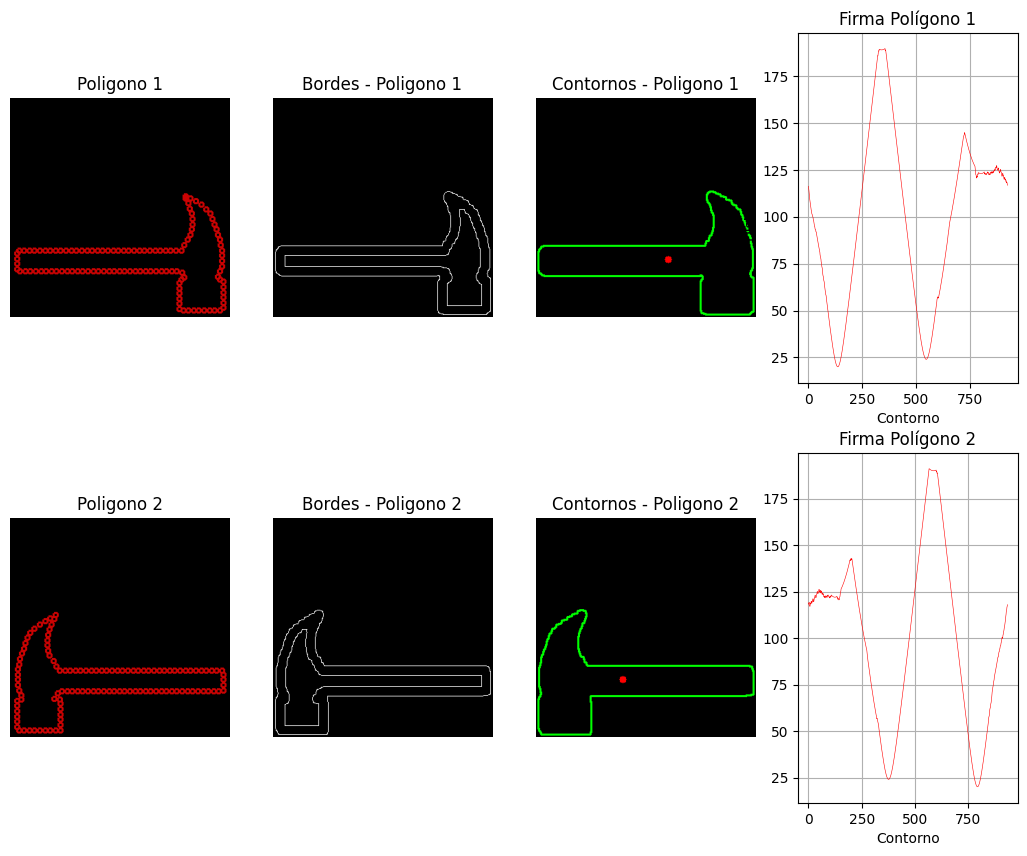

Contorno 1: 924
Contorno 2: 935


In [12]:
def get_index_mayor(conts):
  maximo = -1
  for i in range(len(conts)):
    if (len(conts[i])>maximo):
      maximo = i


  return maximo

#url = './dataset/train/hammer-4.png'

#page = requests.get(url)
img1 = Image.open("./dataset/test/hammer-18.png").convert('RGB') # Cargamos la imagen
# Considerar que cuando se lee la imagen directamente desde el disco, OpenCV la representa como BGR (intercambia los canales Rojo y Azul)

poligono1 = np.array(img1)

#url = 'https://raw.githubusercontent.com/vlarobbyk/fundamentos-vision-artificial-doctoradoCC/main/images/Poligono2.png'

#page = requests.get(url)
img2 = Image.open("./dataset/test/hammer-19.png").convert('RGB') # Cargamos la imagen
# Considerar que cuando se lee la imagen directamente desde el disco, OpenCV la representa como BGR (intercambia los canales Rojo y Azul)

poligono2 = np.array(img2)

gray_p1 = cv2.cvtColor(poligono1, cv2.COLOR_BGR2GRAY)


gray = cv2.GaussianBlur(gray_p1, (3,3), 0)

# Aplicar dilatación
dilated = cv2.dilate(gray, kernel, iterations=2)

# Aplicar erosión sobre la imagen dilatada
closed_manual = cv2.erode(dilated, kernel, iterations=1)



bordes_p1 = cv2.Canny(closed_manual, 50,100)

contornos_p1, jerarquia_p1 = cv2.findContours(bordes_p1, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
img_contornos_p1 = np.zeros(poligono1.shape, dtype=np.uint8)
cv2.drawContours(img_contornos_p1, contornos_p1, get_index_mayor(contornos_p1), (0, 255, 0), 2)
momentos_p1 = cv2.moments(bordes_p1)#contornos_p1[get_index_mayor(contornos_p1)])
centroide_p1 = (int(momentos_p1['m10'] / momentos_p1['m00']), int(momentos_p1['m01'] / momentos_p1['m00']))
cv2.circle(img_contornos_p1, centroide_p1, 5, (255, 0, 0), -1)


gray_p2 = cv2.cvtColor(poligono2, cv2.COLOR_BGR2GRAY)


gray = cv2.GaussianBlur(gray_p2, (3,3), 0)

# Aplicar dilatación
dilated = cv2.dilate(gray, kernel, iterations=2)

# Aplicar erosión sobre la imagen dilatada
closed_manual = cv2.erode(dilated, kernel, iterations=1)


bordes_p2 = cv2.Canny(closed_manual, 50, 100)

contornos_p2, jerarquia_p2 = cv2.findContours(bordes_p2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
img_contornos_p2 = np.zeros(poligono2.shape, dtype=np.uint8)
cv2.drawContours(img_contornos_p2, contornos_p2, get_index_mayor(contornos_p2), (0, 255, 0), 2)
momentos_p2 = cv2.moments(bordes_p2)#contornos_p2[get_index_mayor(contornos_p2)])
centroide_p2 = (int(momentos_p2['m10'] / momentos_p2['m00']), int(momentos_p2['m01'] / momentos_p2['m00']))
cv2.circle(img_contornos_p2, centroide_p2, 5, (255, 0, 0), -1)


# Graficamos la firma de cada polígono
distancias_p1 = []

for contorno in contornos_p1[get_index_mayor(contornos_p1)]:
  #print(contorno[0])
  distancias_p1.append(get_distance(contorno, centroide_p1))


distancias_p2 = []

for contorno in contornos_p2[get_index_mayor(contornos_p2)]:
  #print(contorno[0])
  distancias_p2.append(get_distance(contorno, centroide_p2))


figure, axes = pp.subplots(nrows=2, ncols=4)
figure.set_size_inches(13,10)

axes[0,0].imshow(poligono1)
axes[0,0].axis('off')
axes[0,0].set_title('Poligono 1')

axes[0,1].imshow(bordes_p1, cmap='gray')
axes[0,1].axis('off')
axes[0,1].set_title('Bordes - Poligono 1')

axes[0,2].imshow(img_contornos_p1)
axes[0,2].axis('off')
axes[0,2].set_title('Contornos - Poligono 1')


ix_p1 = np.arange(0,len(distancias_p1),1)
axes[0,3].plot(ix_p1, distancias_p1, lw=0.4, color='red')
axes[0,3].set_title('Firma Polígono 1')
axes[0,3].set_xlabel('Contorno')
axes[0,3].set_ylabel('Distancia')
axes[0,3].grid(True)


axes[1,0].imshow(poligono2)
axes[1,0].axis('off')
axes[1,0].set_title('Poligono 2')

axes[1,1].imshow(bordes_p2, cmap='gray')
axes[1,1].axis('off')
axes[1,1].set_title('Bordes - Poligono 2')

axes[1,2].imshow(img_contornos_p2)
axes[1,2].axis('off')
axes[1,2].set_title('Contornos - Poligono 2')

ix_p2 = np.arange(0,len(distancias_p2),1)
axes[1,3].plot(ix_p2, distancias_p2, lw=0.4, color='red')
axes[1,3].set_title('Firma Polígono 2')
axes[1,3].set_xlabel('Contorno')
axes[1,3].set_ylabel('Distancia')
axes[1,3].grid(True)

pp.show()

print('Contorno 1:', len(contornos_p1[get_index_mayor(contornos_p1)]))
print('Contorno 2:', len(contornos_p2[get_index_mayor(contornos_p2)]))

Cálculo de la transformada rápida de Fourier de las dos señales:

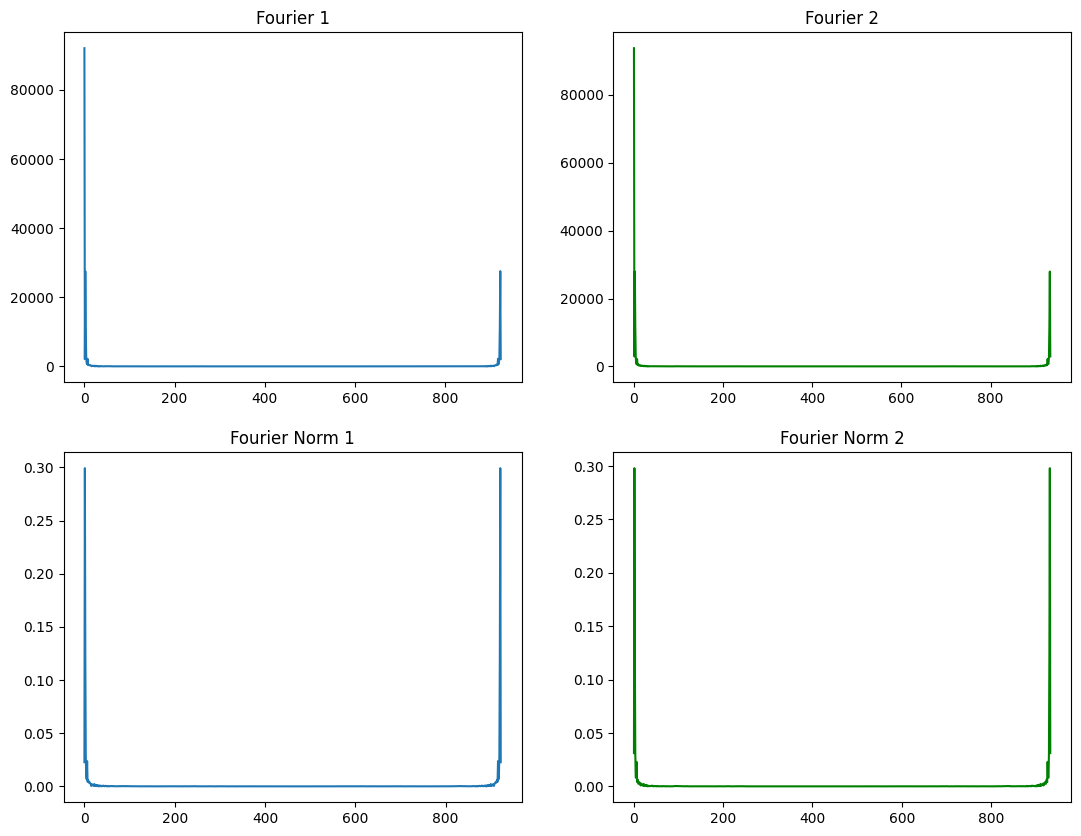

Distancia: (0.02303800266873336-0.6227492804581949j)


In [13]:
def distancia(dis1, dis2):
  dis = 0.0
  for i in range(8):
    dis += (dis1[i] - dis2[i])**2

  return np.sqrt(dis)


fourier_X1 = fft(distancias_p1)
fourier_X2 = fft(distancias_p2)

fourier_X1_N = fourier_X1/fourier_X1[0]
fourier_X2_N = fourier_X2/fourier_X2[0]

figure, axes = pp.subplots(nrows=2, ncols=2)
figure.set_size_inches(13,10)

axes[0,0].plot(np.abs(fourier_X1))
axes[0,0].set_title('Fourier 1')


axes[0,1].plot(np.abs(fourier_X2), color = 'green')
axes[0,1].set_title('Fourier 2')


axes[1,0].plot(np.abs(fourier_X1_N[1:]))
axes[1,0].set_title('Fourier Norm 1')


axes[1,1].plot(np.abs(fourier_X2_N[1:]), color = 'green')
axes[1,1].set_title('Fourier Norm 2')

pp.show()

distancia = distancia(fourier_X1_N, fourier_X2_N)
print('Distancia:', distancia)


In [61]:
import os
import numpy as np
import cv2
from PIL import Image
from scipy.fft import fft
from sklearn.preprocessing import normalize

# Longitud fija para las shape signatures
n_samples = 128

# Función para procesar una imagen y extraer su shape signature
def process_image(src, n_samples):
    img = Image.open(src).convert('RGB')
    image = np.array(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    kernel = np.ones((5, 5), np.uint8)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    dilated = cv2.dilate(gray, kernel, iterations=2)
    closed_manual = cv2.erode(dilated, kernel, iterations=1)
    bordes = cv2.Canny(closed_manual, 50, 100)
    
    contornos, _ = cv2.findContours(bordes, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contornos:
        contorno = contornos[0]  # Usar el primer contorno encontrado
        centroide = cv2.moments(contorno)
        if centroide['m00'] != 0:
            centroide = (int(centroide['m10'] / centroide['m00']), int(centroide['m01'] / centroide['m00']))
        else:
            centroide = (0, 0)

        # Calcular la signature de la forma
        shape_signature = []
        for punto in contorno:
            punto = punto[0]
            distancia = np.sqrt((punto[0] - centroide[0]) ** 2 + (punto[1] - centroide[1]) ** 2)
            shape_signature.append(distancia)
        
        shape_signature = np.array(shape_signature)
        
        # Redimensionar la shape signature a una longitud fija
        if len(shape_signature) > n_samples:
            shape_signature = shape_signature[:n_samples]
        else:
            shape_signature = np.pad(shape_signature, (0, max(0, n_samples - len(shape_signature))), 'constant')

        # Realizar FFT en la shape signature
        shape_signature_fft = np.abs(fft(shape_signature))
        
        # Normalizar la FFT
        shape_signature_fft = normalize(shape_signature_fft[:,np.newaxis], axis=0).ravel()

        return shape_signature_fft
    else:
        return None

# Directorio de imágenes
image_directory = "./dataset/train"
features = []
labels = []

# Diccionario para mapear nombres de clases a números
class_mapping = {}

for filename in os.listdir(image_directory):
    if filename.endswith(".png"):
        filepath = os.path.join(image_directory, filename)
        
        # Extraer el nombre del objeto antes del guion
        label_name = filename.split('-')[0]
        
        # Asignar un número único a cada etiqueta de clase
        if label_name not in class_mapping:
            class_mapping[label_name] = len(class_mapping)
        
        label = class_mapping[label_name]
        
        feature = process_image(filepath, n_samples)
        if feature is not None:
            features.append(feature)
            labels.append(label)

# Convertir a arrays de numpy
features = np.array(features)
labels = np.array(labels)

# Guardar las características, etiquetas y el mapeo de clases
np.save('features.npy', features)
np.save('labels.npy', labels)
np.save('class_mapping.npy', class_mapping)

# Imprimir el mapeo de clases para referencia
print("Class mapping:", class_mapping)


Class mapping: {'hammer': 0, 'guitar': 1, 'Glas': 2}


In [62]:
class_mapping

{'hammer': 0, 'guitar': 1, 'Glas': 2}

Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

      hammer       0.83      1.00      0.91         5
      guitar       0.56      1.00      0.71         5
        Glas       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.46      0.67      0.54        15
weighted avg       0.46      0.67      0.54        15

Confusion Matrix:
 [[5 0 0]
 [0 5 0]
 [1 4 0]]


/home/diego/UPS/VISION/practicas/practica4/practica_4_shape_signature/shapesign-venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/UPS/VISION/practicas/practica4/practica_4_shape_signature/shapesign-venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/UPS/VISION/practicas/practica4/practica_4_shape_signature/shapesign-venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set 

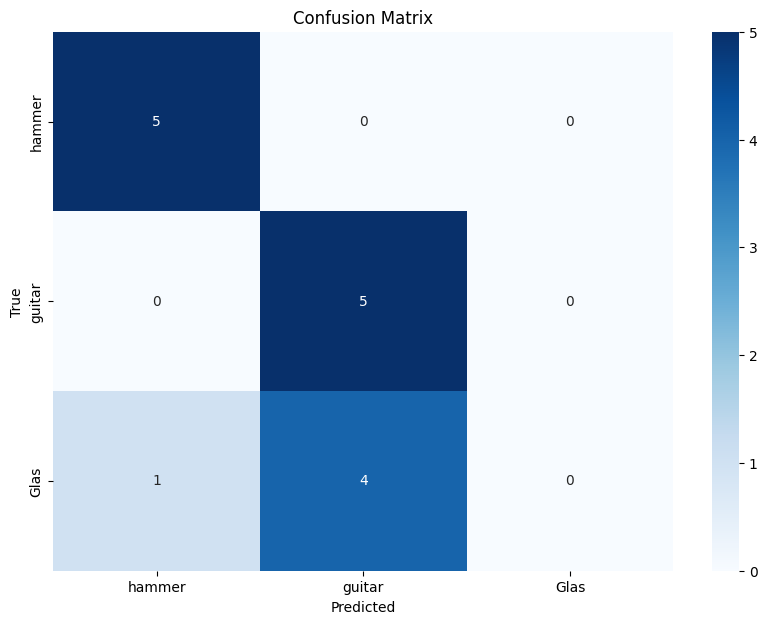

In [65]:
import os
import numpy as np
import cv2
from PIL import Image
from scipy.fft import fft
from sklearn.preprocessing import normalize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Longitud fija para las shape signatures
n_samples = 128

# Función para procesar una imagen y extraer su shape signature
def process_image(src, n_samples):
    img = Image.open(src).convert('RGB')
    image = np.array(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    kernel = np.ones((5, 5), np.uint8)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    dilated = cv2.dilate(gray, kernel, iterations=2)
    closed_manual = cv2.erode(dilated, kernel, iterations=1)
    bordes = cv2.Canny(closed_manual, 50, 100)
    
    contornos, _ = cv2.findContours(bordes, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contornos:
        contorno = contornos[0]  # Usar el primer contorno encontrado
        centroide = cv2.moments(contorno)
        if centroide['m00'] != 0:
            centroide = (int(centroide['m10'] / centroide['m00']), int(centroide['m01'] / centroide['m00']))
        else:
            centroide = (0, 0)

        # Calcular la signature de la forma
        shape_signature = []
        for punto in contorno:
            punto = punto[0]
            distancia = np.sqrt((punto[0] - centroide[0]) ** 2 + (punto[1] - centroide[1]) ** 2)
            shape_signature.append(distancia)
        
        shape_signature = np.array(shape_signature)
        
        # Redimensionar la shape signature a una longitud fija
        if len(shape_signature) > n_samples:
            shape_signature = shape_signature[:n_samples]
        else:
            shape_signature = np.pad(shape_signature, (0, max(0, n_samples - len(shape_signature))), 'constant')

        # Realizar FFT en la shape signature
        shape_signature_fft = np.abs(fft(shape_signature))
        
        # Normalizar la FFT
        shape_signature_fft = normalize(shape_signature_fft[:,np.newaxis], axis=0).ravel()

        return shape_signature_fft
    else:
        return None

# Función para cargar y procesar imágenes desde un directorio
def load_dataset(image_directory, n_samples, class_mapping=None):
    features = []
    labels = []
    if class_mapping is None:
        class_mapping = {}

    for filename in os.listdir(image_directory):
        if filename.endswith(".png"):
            filepath = os.path.join(image_directory, filename)
            
            # Extraer el nombre del objeto antes del guion
            label_name = filename.split('-')[0]
            
            # Asignar un número único a cada etiqueta de clase
            if label_name not in class_mapping:
                class_mapping[label_name] = len(class_mapping)
            
            label = class_mapping[label_name]
            
            feature = process_image(filepath, n_samples)
            if feature is not None:
                features.append(feature)
                labels.append(label)

    features = np.array(features)
    labels = np.array(labels)

    return features, labels, class_mapping

# Cargar y procesar el conjunto de entrenamiento
train_dir = "./dataset/train"
X_train, y_train, class_mapping = load_dataset(train_dir, n_samples)

# Cargar y procesar el conjunto de prueba
test_dir = "./dataset/test"
X_test, y_test, _ = load_dataset(test_dir, n_samples, class_mapping)

# Entrenar el modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predecir etiquetas para el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

classification_rep = classification_report(y_test, y_pred, target_names=class_mapping.keys())
print("Classification Report:\n", classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
